<a href="https://colab.research.google.com/github/Hossein-Bg/Indoor-Scene-Recognition-Pytorch/blob/main/Indoor_Scene_Recognition_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules
import torch
from torch import nn
import matplotlib.pyplot as plt
import os

In [ ]:
# data directory
data_path = '/content/drive/MyDrive/MultiMediaProject/'
image_path = data_path + 'Images'
image_path
# os.listdir(data_path)
# os.listdir(os.path.join(data_path, 'bathroom'))

'/content/drive/MyDrive/MultiMediaProject/Images'

In [ ]:
# getting info from our directory path
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 67 directories and 0 images in '/content/drive/MyDrive/MultiMediaProject/Images'.
There are 0 directories and 197 images in '/content/drive/MyDrive/MultiMediaProject/Images/bathroom'.
There are 0 directories and 405 images in '/content/drive/MyDrive/MultiMediaProject/Images/bakery'.
There are 0 directories and 140 images in '/content/drive/MyDrive/MultiMediaProject/Images/artstudio'.
There are 0 directories and 604 images in '/content/drive/MyDrive/MultiMediaProject/Images/bar'.
There are 0 directories and 662 images in '/content/drive/MyDrive/MultiMediaProject/Images/bedroom'.
There are 0 directories and 608 images in '/content/drive/MyDrive/MultiMediaProject/Images/airport_inside'.
There are 0 directories and 213 images in '/content/drive/MyDrive/MultiMediaProject/Images/bowling'.
There are 0 directories and 176 images in '/content/drive/MyDrive/MultiMediaProject/Images/auditorium'.
There are 0 directories and 111 images in '/content/drive/MyDrive/MultiMediaProject/Images/b

Random image path: /content/drive/MyDrive/MultiMediaProject/Images/nursery/finished_babys_room__5_.jpg
Image class: nursery
Image height: 300
Image width: 400


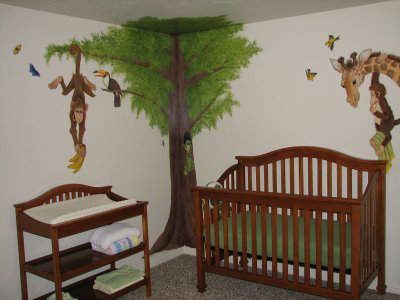

In [ ]:
#  Visualize an image
import random
from PIL import Image
from pathlib import Path

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = []
images = Path(image_path).glob('*/*.jpg')
for image in images:
    image_path_list.append(image)
# image_path_list

# 2. Get random image path
random_image_path = random.choice(image_path_list)
# random_image_path

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# image_class

# 4. Open image
img = Image.open(random_image_path)
# img

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

We can do the same with matplotlib.pyplot.imshow(), except we have to convert the image to a NumPy array first.

(-0.5, 399.5, 299.5, -0.5)

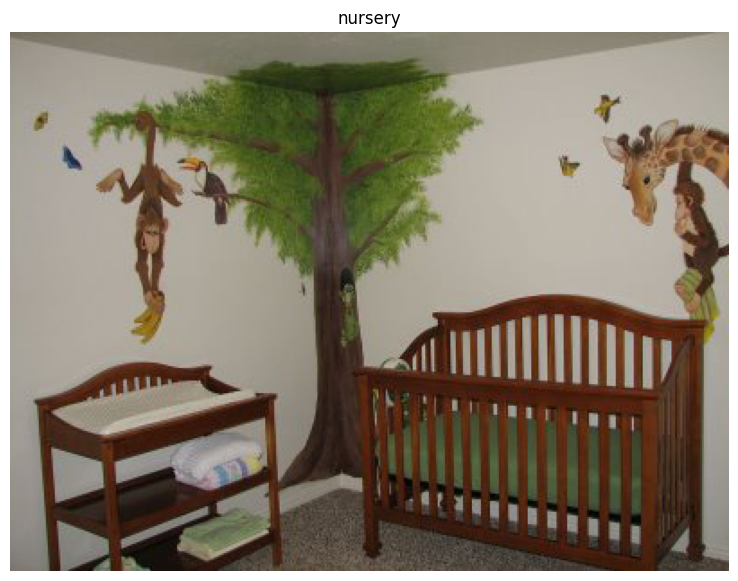

In [ ]:
# visualize with matplotlib
import numpy as np
img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(image_class)
plt.axis(False)

In [ ]:
img_as_array

array([[[114, 108,  94],
        [114, 108,  94],
        [115, 109,  95],
        ...,
        [160, 154, 140],
        [160, 154, 140],
        [160, 154, 140]],

       [[116, 110,  96],
        [116, 110,  96],
        [116, 110,  96],
        ...,
        [163, 157, 143],
        [162, 156, 142],
        [162, 156, 142]],

       [[122, 116, 102],
        [121, 115, 101],
        [119, 113,  99],
        ...,
        [165, 159, 145],
        [164, 158, 144],
        [163, 157, 143]],

       ...,

       [[124, 119, 113],
        [124, 119, 113],
        [125, 120, 114],
        ...,
        [ 73,  63,  53],
        [ 77,  67,  57],
        [ 78,  68,  58]],

       [[123, 118, 112],
        [123, 118, 112],
        [124, 119, 113],
        ...,
        [ 71,  63,  52],
        [ 77,  69,  58],
        [ 83,  75,  64]],

       [[122, 117, 111],
        [123, 118, 112],
        [123, 118, 112],
        ...,
        [ 66,  58,  47],
        [ 75,  67,  56],
        [ 88,  80,  69]]

In [ ]:
# Setup device-agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# Transforming data
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    # Resize the images to 32 * 32
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)), #  randomly crops and resizes the images to a size between 80% and 100%
    # Flip the images randomly on the horizontal(Data Augmentation)
    transforms.RandomHorizontalFlip(), # p = probability of flip, 0.5 = 50% chance
    transforms.RandomRotation(10),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
"""

[batchsize, color_channel, height, width] in pytorch

                    but

in others it is --> [batchsize, height, width, color_channel]

"""
data_transform(img), data_transform(img).shape


(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 torch.Size([3, 224, 224]))

Now we've got a composition of transforms, let's write a function to try them out on various images.

In [ ]:
# visualize transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    if seed:
      random.seed(42)

    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
      with Image.open(image_path) as f:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(f)
        ax[0].set_title(f"Original \nSize: {f.size}")
        ax[0].axis(False)

        # Transform and plot image
        transformed_image = transform(f).permute(1, 2, 0)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
        ax[1].axis("off")

        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

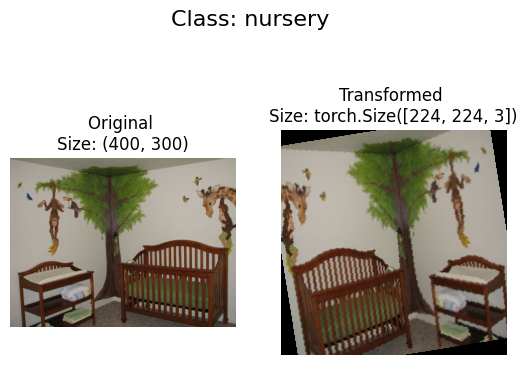

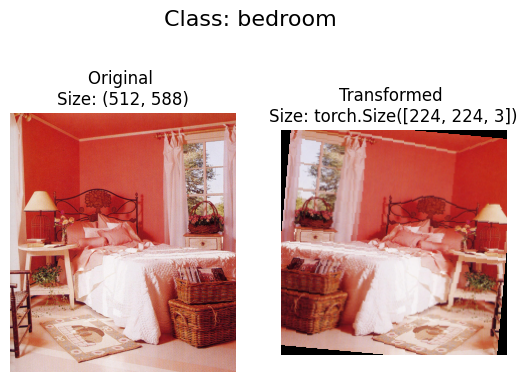

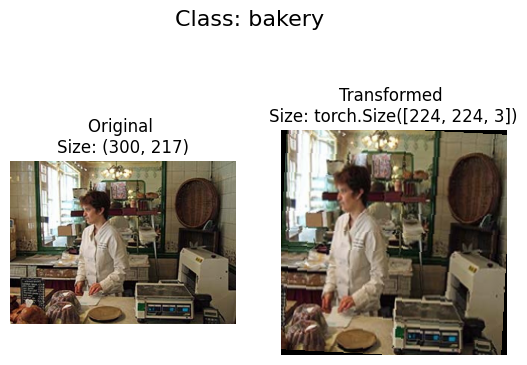

In [ ]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [ ]:
# Loading Image Data Using ImageFolder
# Use ImageFolder to create dataset(s)
from torchvision import datasets

dataset = datasets.ImageFolder(root=image_path, # target folder of images
                               transform=data_transform, # transforms to perform on data
                               target_transform=None) # transforms to perform on labels (if necessary)
dataset

Dataset ImageFolder
    Number of datapoints: 15626
    Root location: /content/drive/MyDrive/MultiMediaProject/Images
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [ ]:
len(dataset)

15626

In [ ]:
# Get class names as a list
class_names = dataset.classes
class_names

['airport_inside',
 'artstudio',
 'auditorium',
 'bakery',
 'bar',
 'bathroom',
 'bedroom',
 'bookstore',
 'bowling',
 'buffet',
 'casino',
 'children_room',
 'church_inside',
 'classroom',
 'cloister',
 'closet',
 'clothingstore',
 'computerroom',
 'concert_hall',
 'corridor',
 'deli',
 'dentaloffice',
 'dining_room',
 'elevator',
 'fastfood_restaurant',
 'florist',
 'gameroom',
 'garage',
 'greenhouse',
 'grocerystore',
 'gym',
 'hairsalon',
 'hospitalroom',
 'inside_bus',
 'inside_subway',
 'jewelleryshop',
 'kindergarden',
 'kitchen',
 'laboratorywet',
 'laundromat',
 'library',
 'livingroom',
 'lobby',
 'locker_room',
 'mall',
 'meeting_room',
 'movietheater',
 'museum',
 'nursery',
 'office',
 'operating_room',
 'pantry',
 'poolinside',
 'prisoncell',
 'restaurant',
 'restaurant_kitchen',
 'shoeshop',
 'stairscase',
 'studiomusic',
 'subway',
 'toystore',
 'trainstation',
 'tv_studio',
 'videostore',
 'waitingroom',
 'warehouse',
 'winecellar']

In [ ]:
# Can also get class names as a dict
class_dict = dataset.class_to_idx
class_dict

{'airport_inside': 0,
 'artstudio': 1,
 'auditorium': 2,
 'bakery': 3,
 'bar': 4,
 'bathroom': 5,
 'bedroom': 6,
 'bookstore': 7,
 'bowling': 8,
 'buffet': 9,
 'casino': 10,
 'children_room': 11,
 'church_inside': 12,
 'classroom': 13,
 'cloister': 14,
 'closet': 15,
 'clothingstore': 16,
 'computerroom': 17,
 'concert_hall': 18,
 'corridor': 19,
 'deli': 20,
 'dentaloffice': 21,
 'dining_room': 22,
 'elevator': 23,
 'fastfood_restaurant': 24,
 'florist': 25,
 'gameroom': 26,
 'garage': 27,
 'greenhouse': 28,
 'grocerystore': 29,
 'gym': 30,
 'hairsalon': 31,
 'hospitalroom': 32,
 'inside_bus': 33,
 'inside_subway': 34,
 'jewelleryshop': 35,
 'kindergarden': 36,
 'kitchen': 37,
 'laboratorywet': 38,
 'laundromat': 39,
 'library': 40,
 'livingroom': 41,
 'lobby': 42,
 'locker_room': 43,
 'mall': 44,
 'meeting_room': 45,
 'movietheater': 46,
 'museum': 47,
 'nursery': 48,
 'office': 49,
 'operating_room': 50,
 'pantry': 51,
 'poolinside': 52,
 'prisoncell': 53,
 'restaurant': 54,
 'resta

In [ ]:
# dataset.targets

In [ ]:
# First image of dataset
dataset[0], dataset.samples[0]

((tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
  
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
  
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]),
  0),
 ('/content/drive/MyDrive/MultiMediaProject/Images/airport_inside/airport_inside_0001.jpg',
  0))

In [ ]:
dataset[0][0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
dataset[0][1]

0

In [ ]:
img, label = dataset[0][0], dataset[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 224, 224])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


(-0.5, 223.5, 223.5, -0.5)

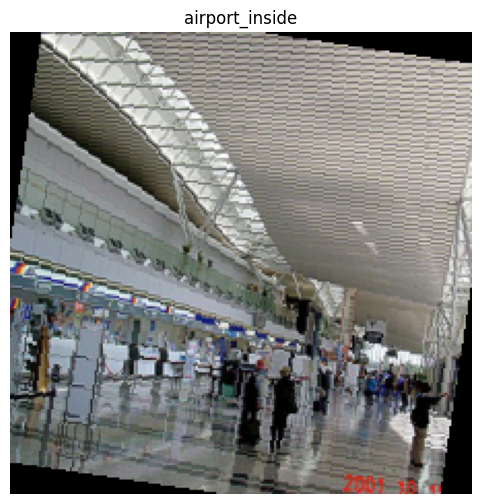

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 6))
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis(False)

In [ ]:
len(dataset)

15626

In [ ]:
# Loading and Splitting Data
from torch.utils.data import random_split

torch.manual_seed(42)
val_size = int(len(dataset) * 0.2) # 20 percent of dataset is for validation set
train_size = len(dataset) - val_size

train_data, validation_data = random_split(dataset, [train_size, val_size])

len(train_data), len(validation_data)

(12501, 3125)

In [ ]:
# Turn train and validation into DataLoaders
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size, # how many samples per batch?
                              num_workers=4, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True, # shuffle the data?
                              pin_memory=True) # If True, the data loader will copy Tensors into device/CUDA pinned memory before returning them.

validation_dataloader = DataLoader(dataset=validation_data,
                                   batch_size=batch_size*2, # we do not need calculate the gradient so we need the half of the memory
                                   num_workers=4,
                                   pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# os.cpu_count()

In [ ]:
img, label = next(iter(train_dataloader))
# Batch size will now be 32
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [ ]:
# Create a function to display random images
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: list[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

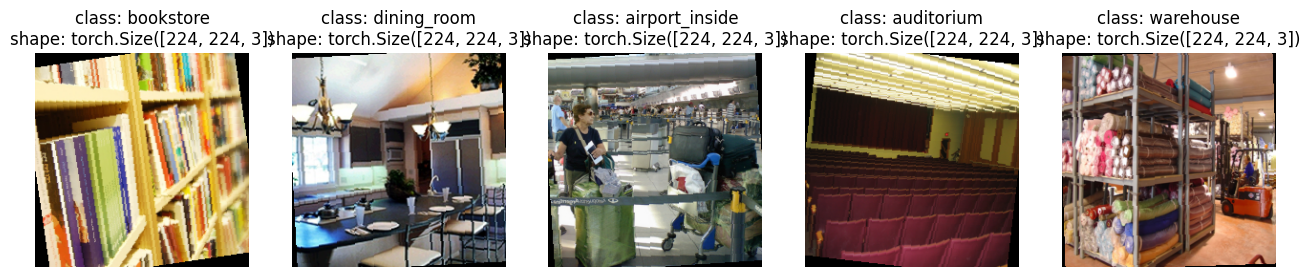

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

In [ ]:
# showing the first batch (The first 32 images)
from torchvision.utils import make_grid

def show_first_batch(dataset):
  for images, labels in dataset:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    ax.axis(False)
    break

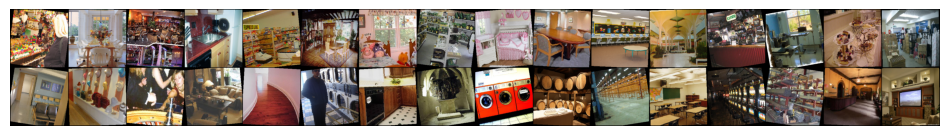

In [ ]:
show_first_batch(train_dataloader)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class VGGModel(nn.Module):
  def __init__(self, input_shape: int, output_shape: int):
    super(VGGModel, self).__init__()
    self.conv1 = nn.Conv2d(input_shape, 16, kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(32 * 56 * 56, 128)
    self.relu3 = nn.ReLU()
    self.fc2 = nn.Linear(128, output_shape)  # Change 67 to the number of classes in your dataset

  def forward(self, x):
    x = self.pool1(self.relu1(self.conv1(x)))
    x = self.pool2(self.relu2(self.conv2(x)))
    x = self.flatten(x)
    x = self.relu3(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
len(class_names)

67

In [ ]:
# Create an instance of the model
torch.manual_seed(42)
model = VGGModel(input_shape=3, # number of color channels (3 for RGB)
                 output_shape=len(class_names)).to(device)
model

VGGModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=67, bias=True)
)

In [ ]:
!nvidia-smi

Sun Jul  2 06:15:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    34W /  70W |   2529MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
for images, labels in train_dataloader:
  images = images.to(device)
  labels = labels.to(device)

  print(f"images shape: {images.shape}")
  out = model(images)
  print(f"out shape: {out.shape}")
  print(f"out[0]: {out[0]}")
  break

images shape: torch.Size([32, 3, 224, 224])
out shape: torch.Size([32, 67])
out[0]: tensor([-0.0112,  0.0493, -0.0151,  0.0179, -0.0395, -0.0059,  0.0041, -0.0656,
        -0.0035, -0.0305, -0.0556,  0.0416, -0.0062,  0.0198,  0.0541, -0.0208,
         0.0806, -0.0389, -0.0128, -0.0187,  0.0730, -0.0073, -0.0849,  0.0505,
         0.0446, -0.0060, -0.0296, -0.0223, -0.0420, -0.0294, -0.0310,  0.0030,
        -0.0714, -0.0681,  0.0255, -0.0349,  0.0613,  0.0043,  0.0470, -0.0644,
         0.0534, -0.0347, -0.0171, -0.0673,  0.0485, -0.0865,  0.0483, -0.0950,
        -0.0200,  0.0846,  0.0465, -0.0185, -0.0506,  0.0587,  0.0104, -0.0857,
         0.0965,  0.0640, -0.0758, -0.0226, -0.0064,  0.0326,  0.0858,  0.0368,
        -0.0543,  0.0736, -0.0246], device='cuda:0', grad_fn=<SelectBackward0>)


In [ ]:
!pip install torchinfo

In [ ]:
# Print the model summary
from torchinfo import summary
summary(model, input_size=[32, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
VGGModel                                 [32, 67]                  --
├─Conv2d: 1-1                            [32, 16, 224, 224]        448
├─ReLU: 1-2                              [32, 16, 224, 224]        --
├─MaxPool2d: 1-3                         [32, 16, 112, 112]        --
├─Conv2d: 1-4                            [32, 32, 112, 112]        4,640
├─ReLU: 1-5                              [32, 32, 112, 112]        --
├─MaxPool2d: 1-6                         [32, 32, 56, 56]          --
├─Flatten: 1-7                           [32, 100352]              --
├─Linear: 1-8                            [32, 128]                 12,845,184
├─ReLU: 1-9                              [32, 128]                 --
├─Linear: 1-10                           [32, 67]                  8,643
Total params: 12,858,915
Trainable params: 12,858,915
Non-trainable params: 0
Total mult-adds (G): 2.99
Input size (MB): 19.27
Forward/backw

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0
    model.train()

    for images, labels in train_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track training loss and accuracy
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss = train_loss / len(train_dataloader.dataset)
    train_accuracy = 100.0 * train_correct / len(train_dataloader.dataset)

    # Validation loop
    val_loss = 0.0
    val_correct = 0
    model.eval()

    with torch.inference_mode():
        for images, labels in validation_dataloader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track validation loss and accuracy
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_correct += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy
    val_loss = val_loss / len(validation_dataloader.dataset)
    val_accuracy = 100.0 * val_correct / len(validation_dataloader.dataset)


    # Store losses and accuracies for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")



Epoch [1/100] - Train Loss: 3.7752, Train Accuracy: 9.82%, Val Loss: 3.5355, Val Accuracy: 11.23%
Epoch [2/100] - Train Loss: 3.3666, Train Accuracy: 15.74%, Val Loss: 3.3059, Val Accuracy: 16.38%
Epoch [3/100] - Train Loss: 3.1180, Train Accuracy: 20.57%, Val Loss: 3.1973, Val Accuracy: 19.33%
Epoch [4/100] - Train Loss: 2.9443, Train Accuracy: 24.09%, Val Loss: 3.0919, Val Accuracy: 21.25%
Epoch [5/100] - Train Loss: 2.8362, Train Accuracy: 26.03%, Val Loss: 3.0254, Val Accuracy: 23.46%
Epoch [6/100] - Train Loss: 2.7331, Train Accuracy: 28.63%, Val Loss: 2.9534, Val Accuracy: 24.77%
Epoch [7/100] - Train Loss: 2.6614, Train Accuracy: 30.13%, Val Loss: 2.9936, Val Accuracy: 23.65%
Epoch [8/100] - Train Loss: 2.5801, Train Accuracy: 31.73%, Val Loss: 2.9716, Val Accuracy: 23.55%
Epoch [9/100] - Train Loss: 2.5321, Train Accuracy: 32.81%, Val Loss: 2.9396, Val Accuracy: 24.42%
Epoch [10/100] - Train Loss: 2.4674, Train Accuracy: 34.65%, Val Loss: 2.9149, Val Accuracy: 27.14%
Epoch [11/

OSError: ignored

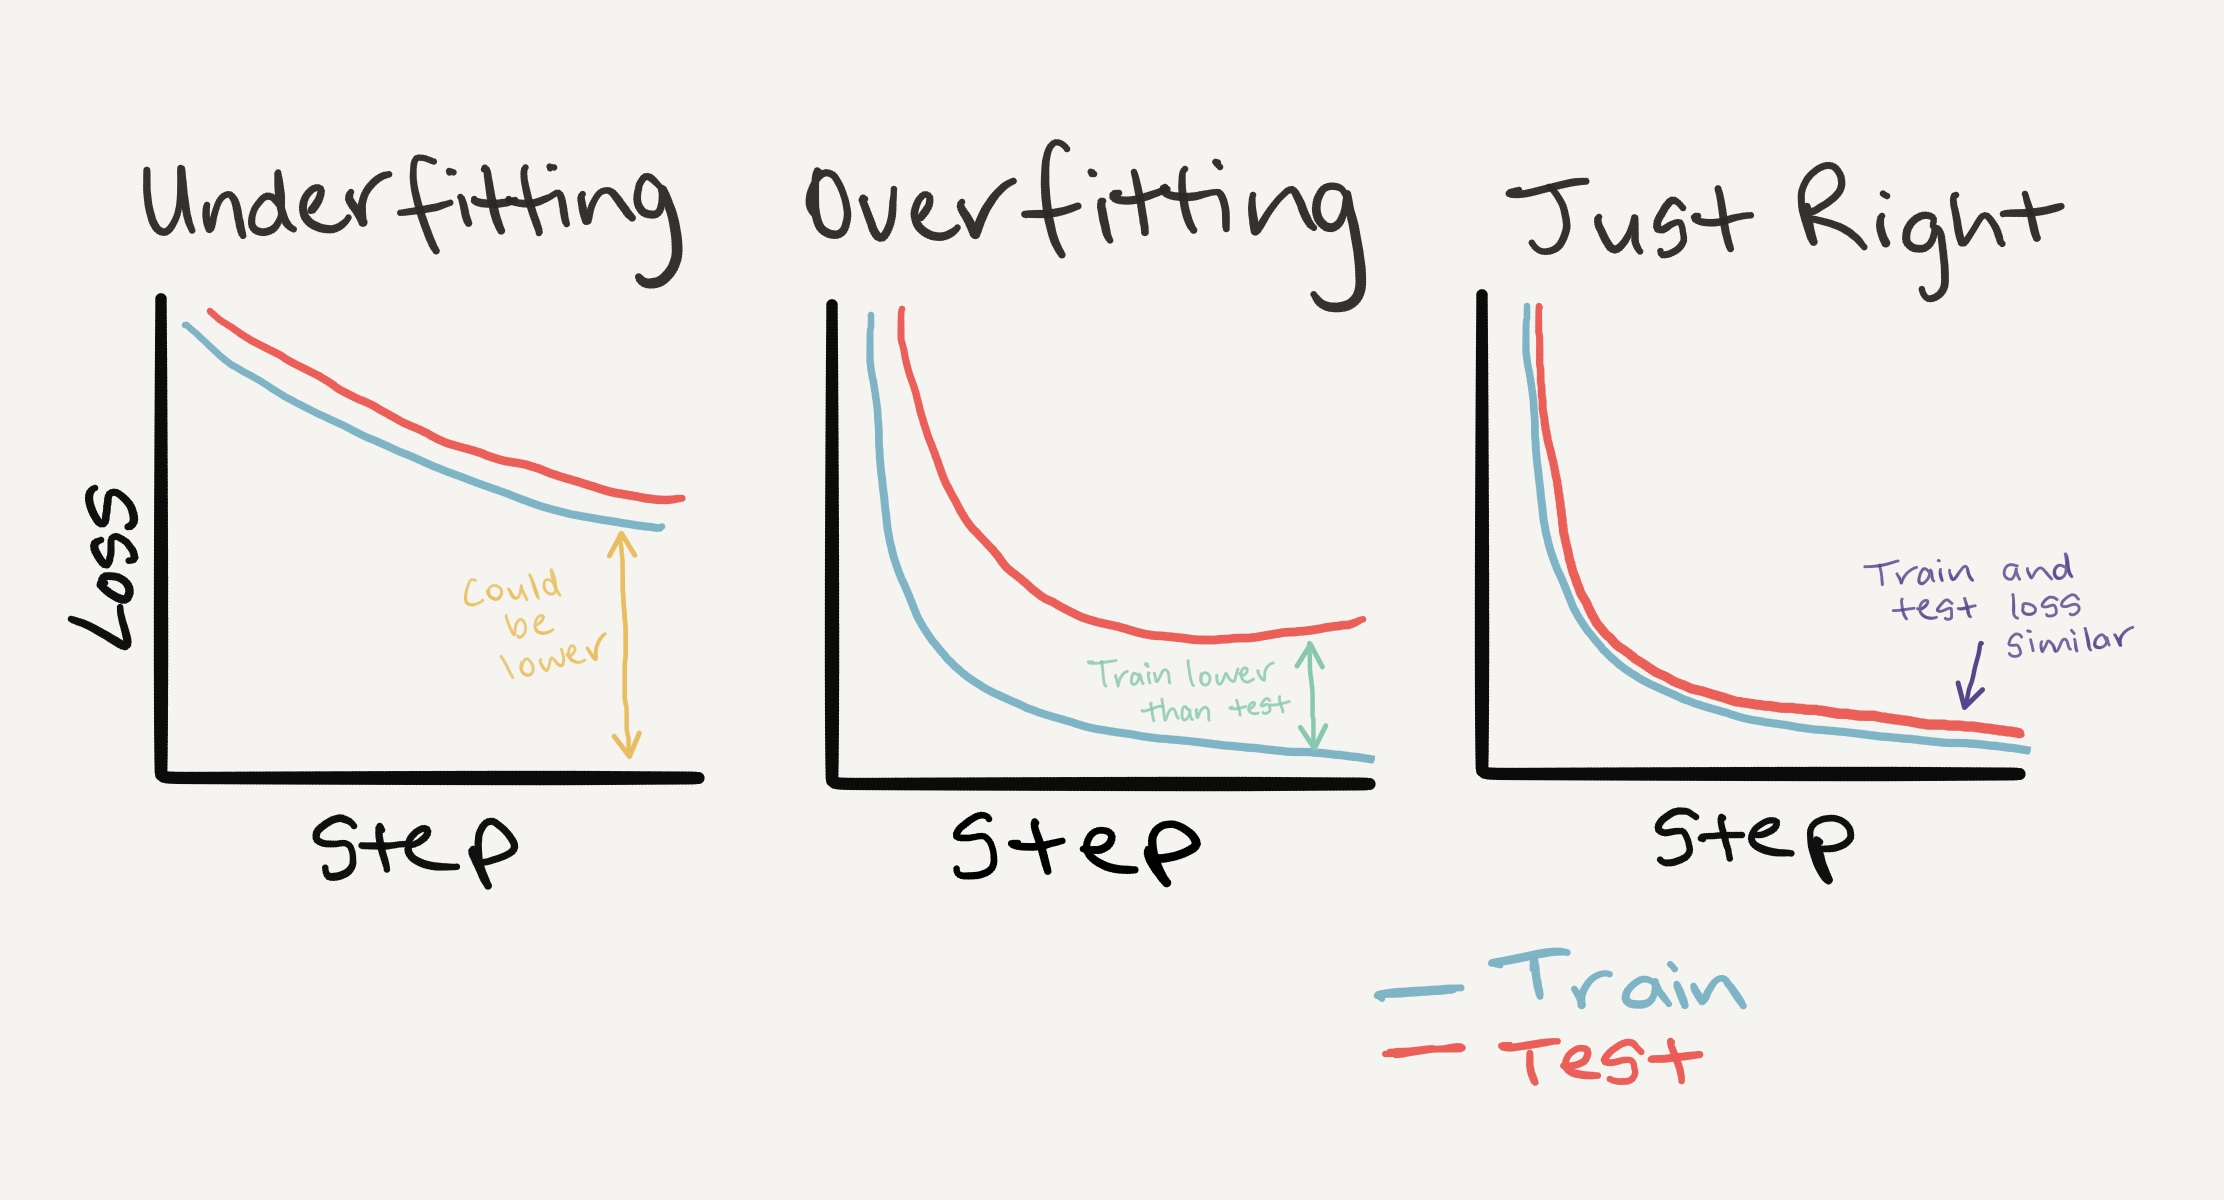

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# Load the test dataset
test_dataset = datasets.ImageFolder(root=image_path, transform=data_transform)

# Data loader for the test dataset
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate the model on the test set
test_correct = 0
model.eval()

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_correct += (predicted == labels).sum().item()

# Calculate test accuracy
test_accuracy = 100.0 * test_correct / len(test_dataloader.dataset)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")
